### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:-
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,372 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,347 kB]
Fetched 5,060 kB i

In [2]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=18231b401eee96f00565055c0aa8cb1720242b4482c5fef2b07c29a1ace19486
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

In [5]:
# Import necessary libraries
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles

In [6]:
spark = SparkSession.builder.appName("Employee Compensation").getOrCreate()
spark

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Set the output file path
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Employee_Compensation.csv'

In [9]:
# Read the file into a Spark DataFrame
df = spark.read.csv(output_file_path,inferSchema=True, header=True)

# Display the DataFrame
df.show(10)

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

In [10]:
df.columns

['Year Type',
 'Year',
 'Organization Group Code',
 'Organization Group',
 'Department Code',
 'Department',
 'Union Code',
 'Union',
 'Job Family Code',
 'Job Family',
 'Job Code',
 'Job',
 'Employee Identifier',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation']

### 1.1 Display the number of rows and columns in the dataset

In [11]:
  # extracting number of rows from the Dataframe
  rows = df.count()
  cols = len(df.columns)
  print("Shape of Dataframe: ",{rows,cols})
  print("No of rows:", rows)
  print("No of columns:", cols)

Shape of Dataframe:  {291825, 22}
No of rows: 291825
No of columns: 22


### 1.2 Check the datatype of the variables

In [12]:
for col in df.dtypes:
    print(col[0]+" : "+col[1])

Year Type : string
Year : int
Organization Group Code : int
Organization Group : string
Department Code : string
Department : string
Union Code : int
Union : string
Job Family Code : string
Job Family : string
Job Code : string
Job : string
Employee Identifier : int
Salaries : double
Overtime : double
Other Salaries : double
Total Salary : double
Retirement : double
Health/Dental : double
Other Benefits : double
Total Benefits : double
Total Compensation : double


In [13]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [14]:
# from pyspark.sql.types import *

from pyspark.sql.types import IntegerType

string_columns = ['Job Family Code','Job Code','Total Compensation']

for col in string_columns:
  df = df.withColumn(col, df[col].cast(IntegerType()))

df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: integer (nullable = true)



In [15]:
# Converting Inter type data columns to Double type data columns

from pyspark.sql.types import DoubleType

columns = ['Year','Organization Group Code','Union Code']

for col in columns:
  df = df.withColumn(col, df[col].cast(DoubleType()))

df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Organization Group Code: double (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: double (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: integer (nullable = true)



In [16]:
redundant_cols = ["Department","Union","Job Family","Employee Identifier"]

for col in redundant_cols:
  df = df.drop(col)

In [17]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Organization Group Code: double (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: double (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: integer (nullable = true)



In [18]:
rows = df.count()
cols = len(df.columns)
print("Shape of Dataframe: ",{rows,cols})
print("No of rows:", rows)
print("No of columns:", cols)

Shape of Dataframe:  {291825, 18}
No of rows: 291825
No of columns: 18


### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [19]:
# df.describe().toPandas()
df.describe().show()

+-------+---------+------------------+-----------------------+--------------------+---------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|  Organization Group|Department Code|       Union Code|   Job Family Code|          Job Code|               Job|         Salaries|          Overtime|   Other Salaries|      Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+--------------------+---------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+----------

In [20]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year Type,291825,None,None,Calendar,Fiscal
Year,291825,2014.325061252463,1.0322652725499475,2013.0,2016.0
Organization Group Code,291825,2.9770513150004283,1.5777709265315083,1.0,7.0
Organization Group,291825,None,None,Community Health,"Public Works, Transportation & Commerce"
Department Code,291825,None,None,AAM,WTR
Union Code,291782,489.5060764543392,333.7611361507317,1.0,990.0
Job Family Code,257154,4778.5595401977025,3090.28317174425,900,9900
Job Code,247664,4911.798751534337,3128.4123150253026,109,9989
Job,291825,None,None,Account Clerk,Youth Comm Advisor


In [21]:
print("Rows with negative values: ")

for column in df.columns:
  print(f"'{column}' : {df.filter(df[column] < 0).count()}")

Rows with negative values: 
'Year Type' : 0
'Year' : 0
'Organization Group Code' : 0
'Organization Group' : 0
'Department Code' : 0
'Union Code' : 0
'Job Family Code' : 0
'Job Code' : 0
'Job' : 0
'Salaries' : 79
'Overtime' : 30
'Other Salaries' : 62
'Total Salary' : 51
'Retirement' : 422
'Health/Dental' : 344
'Other Benefits' : 679
'Total Benefits' : 449
'Total Compensation' : 239


In [22]:
from pyspark.sql.functions import when,col,count

for column in df.columns:
  df = df.withColumn(column,when(col(column)<0,None).otherwise(col(column)))

In [23]:
print("Rows with negative values: ")

for column in df.columns:
  print(f"'{column}' : {df.filter(df[column] < 0).count()}")

Rows with negative values: 
'Year Type' : 0
'Year' : 0
'Organization Group Code' : 0
'Organization Group' : 0
'Department Code' : 0
'Union Code' : 0
'Job Family Code' : 0
'Job Code' : 0
'Job' : 0
'Salaries' : 0
'Overtime' : 0
'Other Salaries' : 0
'Total Salary' : 0
'Retirement' : 0
'Health/Dental' : 0
'Other Benefits' : 0
'Total Benefits' : 0
'Total Compensation' : 0


### 4. Perform Missing Value Analysis

In [24]:
# Check for null values

from pyspark.sql.functions import isnull,when,count,col

df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Code|Job|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|        43|          34671|   44161|  0|      79|      30|            62|          51|       422|          344|           679|           449|               239|
+---------+----+-----------------------+----------------

### 5. Exploratory Data Analysis

In [25]:

df = df.na.drop()


In [26]:
# Check if the null value still exist

df.select([count(when(isnull(c),c)).alias(c) for c in df.columns]).show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Code|Job|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|         0|              0|       0|  0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+-----------------------+----------------

In [27]:
df.columns

['Year Type',
 'Year',
 'Organization Group Code',
 'Organization Group',
 'Department Code',
 'Union Code',
 'Job Family Code',
 'Job Code',
 'Job',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation']

#### 5.1. Find top compensating organizations. Display using bar plot

In [28]:
from pyspark.sql.functions import desc

df1 = df.groupby('Organization Group').max().select(['Organization Group','max(Total Compensation)']).orderBy(desc("max(Total Compensation)"))

df1.show()


+--------------------+-----------------------+
|  Organization Group|max(Total Compensation)|
+--------------------+-----------------------+
|General Administr...|                 653498|
|   Public Protection|                 466798|
|Public Works, Tra...|                 430872|
|    Community Health|                 422799|
|Human Welfare & N...|                 372586|
|Culture & Recreation|                 318713|
|General City Resp...|                 137930|
+--------------------+-----------------------+



Text(0, 0.5, ' Compensation')

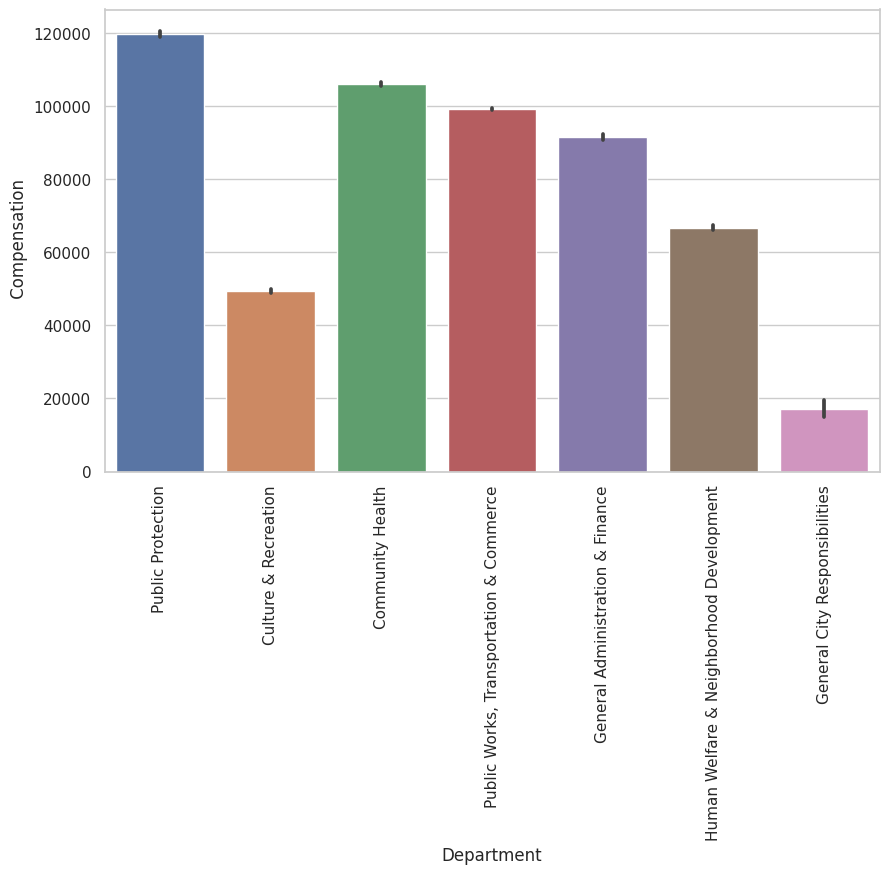

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

org_groups = [data[0] for data in df.select("Organization Group").collect()]
Total_Compensation = [data[0] for data in df.select("Total Compensation").collect()]
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x=org_groups, y=Total_Compensation)
plt.xlabel("Department")
plt.xticks(rotation=90)
plt.ylabel(" Compensation")

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [30]:
df2 = df.groupby('Job').max().select(['Job','max(Total Compensation)']).orderBy(desc("max(Total Compensation)"))

df2.show()

+--------------------+-----------------------+
|                 Job|max(Total Compensation)|
+--------------------+-----------------------+
|Chief Investment ...|                 653498|
|   Asst Med Examiner|                 497505|
|     Chief Of Police|                 466798|
|         Dept Head V|                 433302|
|Chief, Fire Depar...|                 426006|
|Adm, SFGH Medical...|                 422799|
|Executive Contrac...|                 422019|
|Senior Physician ...|                 418013|
|Gen Mgr, Public T...|                 410459|
|Dep Dir For Inves...|                 403743|
|      Deputy Sheriff|                 402204|
|Administrator, De...|                 395626|
|Supervising Physi...|                 390385|
|               Mayor|                 382624|
|Dep Chf Of Dept (...|                 376513|
|         Anesthetist|                 372001|
|          Controller|                 368460|
|        Manager VIII|                 363088|
|       Port 

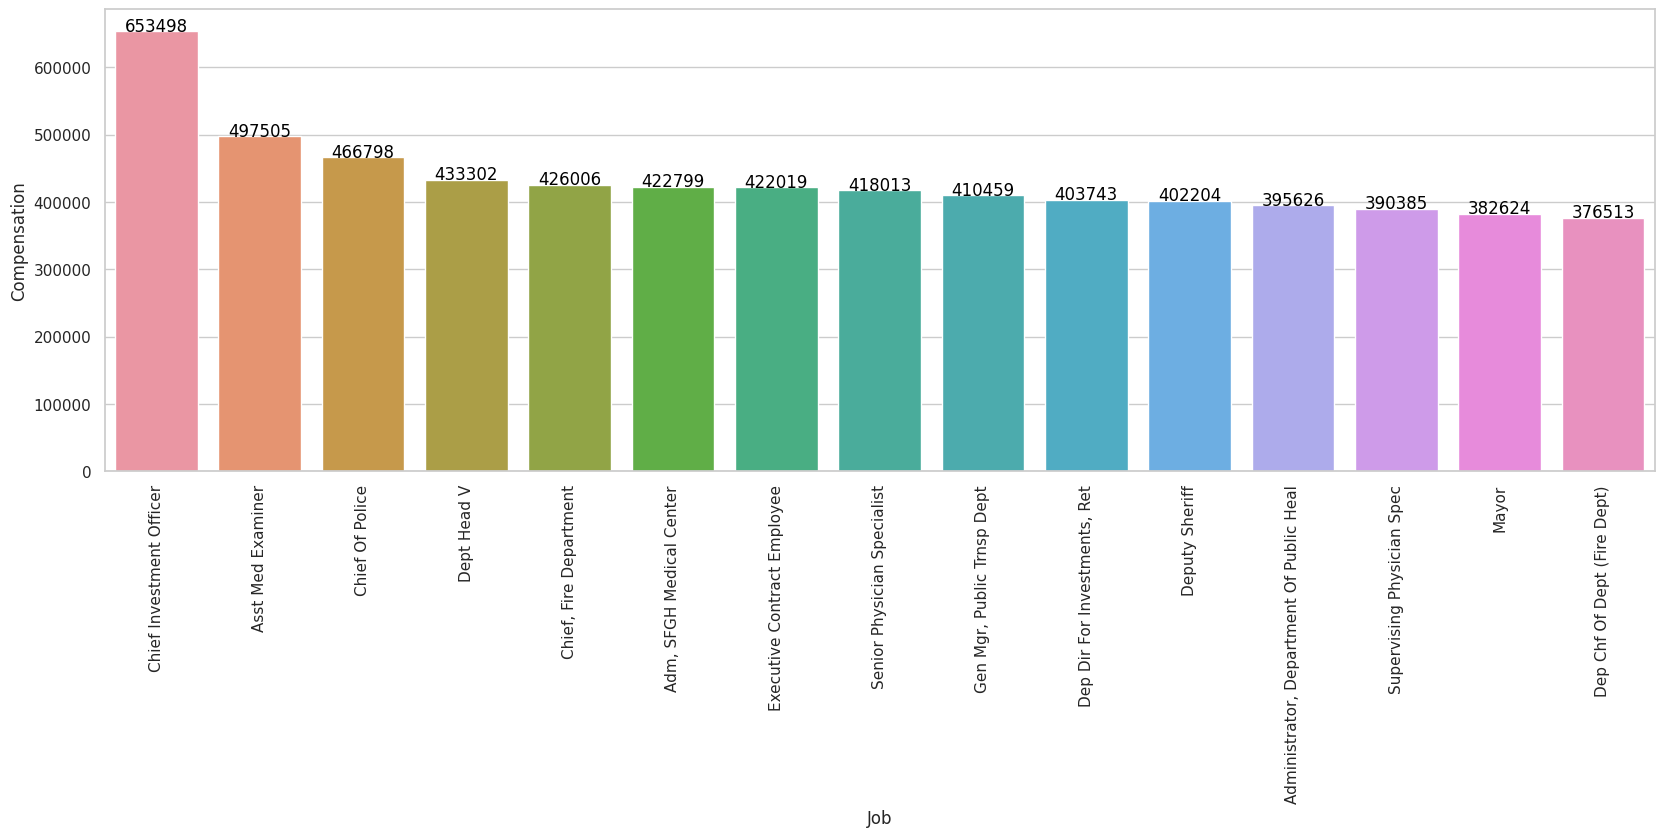

In [31]:
org_groups = [data[0] for data in df2.select("Job").collect()]
# Plotting only the first 15 top compensating jobs
org_groups = org_groups[:15]
Total_Compensation = [data[0] for data in df2.select("max(Total Compensation)").collect()]
Total_Compensation = Total_Compensation[:15]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=org_groups, y=Total_Compensation)

for i, v in enumerate(Total_Compensation):
    plt.text(i, v, str(v), color='black', ha='center')

plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Compensation')
plt.show()

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [32]:
import pandas as pd
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

num_cols = [item[0] for item in df.dtypes if not item[1].startswith('string')]
print(num_cols)


['Year', 'Organization Group Code', 'Union Code', 'Job Family Code', 'Job Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']


In [33]:
assembler = VectorAssembler(inputCols=num_cols,outputCol='features',handleInvalid='keep')
assembleddf = assembler.transform(df).select("features")

# correlation will be in Dense Matrix
correlation = Correlation.corr(assembleddf,"features","pearson").collect()[0][0]

<Axes: >

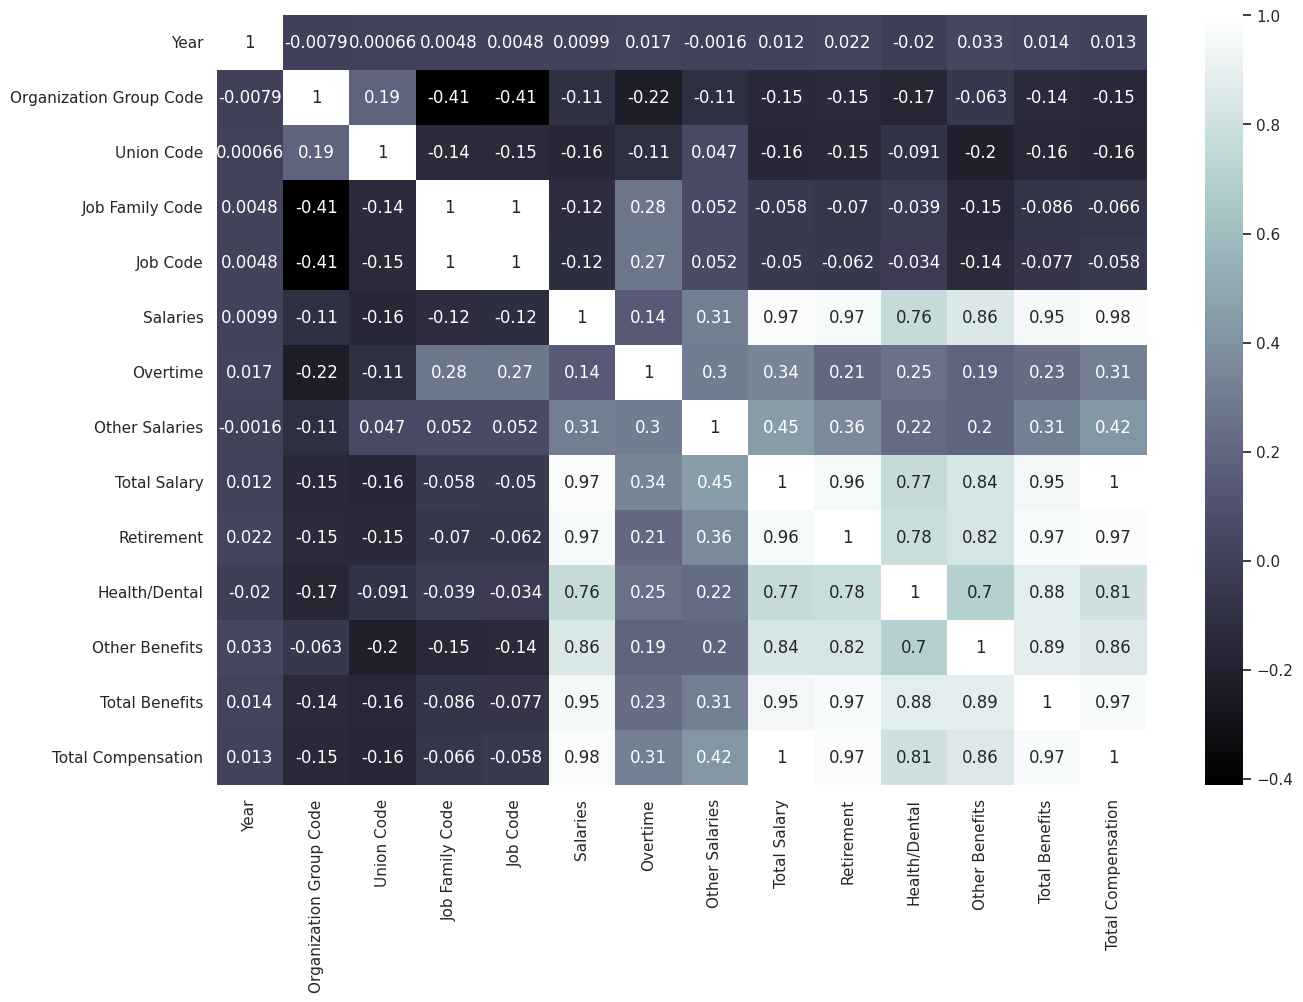

In [34]:
plt.figure(figsize=(15,10))
# To convert Dense Matrix into DataFrame
corr_matrix = correlation.toArray().tolist()
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns=num_cols,index=num_cols)
sns.heatmap(corr_matrix_df,
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,cmap="bone",annot=True)


### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [35]:
from pyspark.ml.feature import StringIndexer

cat_cols = [item[0] for item in df.dtypes if item[1].startswith('string')]
print("cat_cols::",cat_cols)
output_cols = [i+"_indexed" for i in cat_cols]
print("output_cols::",output_cols)

cat_cols:: ['Year Type', 'Organization Group', 'Department Code', 'Job']
output_cols:: ['Year Type_indexed', 'Organization Group_indexed', 'Department Code_indexed', 'Job_indexed']


In [36]:
indexer = StringIndexer(inputCols = cat_cols, outputCols = output_cols, handleInvalid='keep')
StringindexedDf = indexer.fit(df).transform(df)
StringindexedDf.select('Year Type','Year Type_indexed','Organization Group','Organization Group_indexed',
                       'Department Code','Department Code_indexed','Job', 'Job_indexed').show(5,False)

+---------+-----------------+--------------------+--------------------------+---------------+-----------------------+---------------------------+-----------+
|Year Type|Year Type_indexed|Organization Group  |Organization Group_indexed|Department Code|Department Code_indexed|Job                        |Job_indexed|
+---------+-----------------+--------------------+--------------------------+---------------+-----------------------+---------------------------+-----------+
|Fiscal   |0.0              |Public Protection   |5.0                       |DAT            |17.0                   |Attorney (Civil/Criminal)  |9.0        |
|Calendar |1.0              |Culture & Recreation|3.0                       |ART            |42.0                   |Senior Management Assistant|121.0      |
|Calendar |1.0              |Community Health    |1.0                       |DPH            |0.0                    |Eligibility Worker         |13.0       |
|Fiscal   |0.0              |Community Health    |1.

In [37]:
from pyspark.ml.feature import OneHotEncoder
out_cols = [i+"Vec" for i in cat_cols]
encoder = OneHotEncoder(inputCols = output_cols, outputCols = out_cols)
encodedDF = encoder.fit(StringindexedDf).transform(StringindexedDf)
print(encodedDF.columns)

['Year Type', 'Year', 'Organization Group Code', 'Organization Group', 'Department Code', 'Union Code', 'Job Family Code', 'Job Code', 'Job', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation', 'Year Type_indexed', 'Organization Group_indexed', 'Department Code_indexed', 'Job_indexed', 'Year TypeVec', 'Organization GroupVec', 'Department CodeVec', 'JobVec']


In [38]:
encodedDF.select('Year Type_indexed','Year TypeVec','Organization Group_indexed','Organization GroupVec',
 'Department Code_indexed','Department CodeVec','Job_indexed','JobVec').show(5,False)

+-----------------+-------------+--------------------------+---------------------+-----------------------+------------------+-----------+------------------+
|Year Type_indexed|Year TypeVec |Organization Group_indexed|Organization GroupVec|Department Code_indexed|Department CodeVec|Job_indexed|JobVec            |
+-----------------+-------------+--------------------------+---------------------+-----------------------+------------------+-----------+------------------+
|0.0              |(2,[0],[1.0])|5.0                       |(7,[5],[1.0])        |17.0                   |(53,[17],[1.0])   |9.0        |(1020,[9],[1.0])  |
|1.0              |(2,[1],[1.0])|3.0                       |(7,[3],[1.0])        |42.0                   |(53,[42],[1.0])   |121.0      |(1020,[121],[1.0])|
|1.0              |(2,[1],[1.0])|1.0                       |(7,[1],[1.0])        |0.0                    |(53,[0],[1.0])    |13.0       |(1020,[13],[1.0]) |
|0.0              |(2,[0],[1.0])|1.0                      

In [39]:
encodedDF.show(5)

+---------+------+-----------------------+--------------------+---------------+----------+---------------+--------+--------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+-----------------+--------------------------+-----------------------+-----------+-------------+---------------------+------------------+------------------+
|Year Type|  Year|Organization Group Code|  Organization Group|Department Code|Union Code|Job Family Code|Job Code|                 Job| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|Year Type_indexed|Organization Group_indexed|Department Code_indexed|Job_indexed| Year TypeVec|Organization GroupVec|Department CodeVec|            JobVec|
+---------+------+-----------------------+--------------------+---------------+----------+---------------+--------+--------------------+---------+--------+--------------+----

In [40]:
# Import VectorAssembler from pyspark.ml.feature package
from pyspark.ml.feature import VectorAssembler
# Create a list of all the variables that you want to create feature vectors
# These features are then further used for training model

featurecols = ['Year', 'Organization Group Code', 'Union Code', 'Salaries', 'Overtime', 'Other Salaries','Total Salary','Retirement',
          'Health/Dental', 'Other Benefits','Total Benefits','Organization GroupVec', 'Year TypeVec', 'Department CodeVec','JobVec']
# Create the VectorAssembler object
assembler = VectorAssembler(inputCols= featurecols, outputCol="features")
assembledDF = assembler.transform(encodedDF)
assembledDF.select("features").show(5,False)

+-----------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                 |
+-----------------------------------------------------------------------------------------------------------------------------------------+
|(1093,[0,1,2,3,5,6,7,8,9,10,16,18,37,82],[2016.0,1.0,311.0,114473.16,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49,1.0,1.0,1.0,1.0])|
|(1093,[0,1,2,3,6,7,8,9,10,14,19,62,194],[2013.0,5.0,790.0,84077.11,84077.11,16587.3,12457.73,6931.91,35976.94,1.0,1.0,1.0,1.0])          |
|(1093,[0,1,2,3,5,6,8,9,10,12,19,20,86],[2015.0,4.0,535.0,9980.17,798.43,10778.6,2254.93,835.11,3090.04,1.0,1.0,1.0,1.0])                 |
|(1093,[0,1,2,3,6,8,9,10,12,18,20,381],[2015.0,4.0,250.0,2873.41,2873.41,622.63,222.46,845.09,1.0,1.0,1.0,1.0])                           |
|(1093,[0,1,2,3,5,6,

In [41]:
assembledDF.columns

['Year Type',
 'Year',
 'Organization Group Code',
 'Organization Group',
 'Department Code',
 'Union Code',
 'Job Family Code',
 'Job Code',
 'Job',
 'Salaries',
 'Overtime',
 'Other Salaries',
 'Total Salary',
 'Retirement',
 'Health/Dental',
 'Other Benefits',
 'Total Benefits',
 'Total Compensation',
 'Year Type_indexed',
 'Organization Group_indexed',
 'Department Code_indexed',
 'Job_indexed',
 'Year TypeVec',
 'Organization GroupVec',
 'Department CodeVec',
 'JobVec',
 'features']

In [42]:
# Import VectorIndexer from pyspark.ml.feature package
from pyspark.ml.feature import VectorIndexer
# Create a list of all the raw features
# VectorIndexer will automatically identify the categorical columns and index them
feature_cols = ['Year', 'Organization Group Code', 'Union Code', 'Salaries', 'Overtime', 'Other Salaries','Total Salary',
          'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits', 'Year Type_indexed','Organization Group_indexed',
           'Department Code_indexed','Job_indexed']

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols = feature_cols, outputCol = "features")
assembledDf = assembler.transform(StringindexedDf)

# Create the VectorIndexer object. It only take feature column
VecIndexer = VectorIndexer(inputCol="features",outputCol = "indexed_features")

# Fit the vectorindexer object on the output of the vectorassembler data and transform
VecIndexerDF = VecIndexer.fit(assembledDf).transform(assembledDf)
VecIndexerDF.select("features","indexed_features").show(5,False)


+----------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+
|features                                                                                            |indexed_features                                                                                 |
+----------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+
|[2016.0,1.0,311.0,114473.16,0.0,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49,0.0,5.0,17.0,9.0]|[3.0,0.0,311.0,114473.16,0.0,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49,0.0,5.0,17.0,9.0]|
|[2013.0,5.0,790.0,84077.11,0.0,0.0,84077.11,16587.3,12457.73,6931.91,35976.94,1.0,3.0,42.0,121.0]   |[0.0,4.0,790.0,84077.11,0.0,0.0,84077.11,16587.3,12457.73,6931.91,35976.94,1.0,3.0,42.0,121.0]

In [43]:
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT

# Define a udf that converts sparse vector into dense vector
# You cannot create your own custom function and run that against the data directly.
# In Spark, You have to register the function first using udf function
sparseToDense = F.udf(lambda v : Vectors.dense(v),VectorUDT())

# We then call the function here passing the column name on which the function has to be applied
densefeatureDF = assembledDf.withColumn('features_array',sparseToDense('features'))

densefeatureDF.select('features','features_array').show(5,False)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|features                                                                                            |features_array                                                                                      |
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[2016.0,1.0,311.0,114473.16,0.0,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49,0.0,5.0,17.0,9.0]|[2016.0,1.0,311.0,114473.16,0.0,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49,0.0,5.0,17.0,9.0]|
|[2013.0,5.0,790.0,84077.11,0.0,0.0,84077.11,16587.3,12457.73,6931.91,35976.94,1.0,3.0,42.0,121.0]   |[2013.0,5.0,790.0,84077.11,0.0,0.0,84077.11,16587.3,12457.73,6931.91,35976.94,1.0,

In [44]:
densefeatureDF.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Organization Group Code: double (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: double (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Job: string (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: integer (nullable = true)
 |-- Year Type_indexed: double (nullable = false)
 |-- Organization Group_indexed: double (nullable = false)
 |-- Department Code_indexed: double (nullable = false)
 |-- Job_indexed: double (nullable 

In [45]:
# Import StandardScaler from pyspark.ml.feature package
from pyspark.ml.feature import StandardScaler

# Create the StandardScaler object. It only take feature column (dense vector)
stdscaler = StandardScaler(inputCol="features_array", outputCol="scaledfeatures")

# Fit the StandardScaler object on the output of the dense vector data and transform
stdscaledDF = stdscaler.fit(densefeatureDF).transform(densefeatureDF)
stdscaledDF.select("scaledfeatures").show(5,False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaledfeatures                                                                                                                                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1955.538880455361,0.6594641202765739,0.9636432469774373,2.6704803257012775,0.0,0.2746674286581852,2.4681781301259815,2.236110854520254,2.7797981422664306,2.4630909197599857,2.606558109332203,0.0,2.9344633012679195,1.87395128

### 6.2 Split the data into train and test set

In [46]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF, testDF = assembledDF.randomSplit([0.7,0.3],seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

Observations in training set =  172210
Observations in testing set =  73716


### 7. Fit Linear Regression model on the data and check its performance

In [47]:
# import the Linear Regression function from the pyspark.ml.classification package
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features',labelCol='Total Compensation',
                      maxIter=10, regParam=0.8, elasticNetParam=0.1)
lr_model = lr.fit(trainDF)
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(5)

RMSE: 3187.543994
r2: 0.997445
+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
|143809.13482237168|            142735|(1093,[0,1,2,3,6,...|
|185730.62665762976|            198466|(1093,[0,1,2,3,6,...|
| 187694.3615631166|            204307|(1093,[0,1,2,3,6,...|
| 163801.1931124662|            167077|(1093,[0,1,2,3,6,...|
|164208.20329419058|            167252|(1093,[0,1,2,3,6,...|
+------------------+------------------+--------------------+
only showing top 5 rows



In [48]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction",
                labelCol="Total Compensation", metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on val data = 0.997415


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [49]:
# We spilt the data into 70-30 set
# Training Set - 70% obesevations
# Testing Set - 30% observations
trainDF1, testDF1 =  stdscaledDF.randomSplit([0.7,0.3], seed = 2020)

# print the count of observations in each set
print("Observations in training set = ", trainDF1.count())
print("Observations in testing set = ", testDF1.count())

Observations in training set =  172210
Observations in testing set =  73716


In [50]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaledfeatures', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF1)

In [57]:
dt_predictions = dt_model.transform(testDF1)
dt_predictions.select("prediction","Total Compensation","features").show(5)

+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
| 138516.5353016688|            142735|[2013.0,1.0,21.0,...|
|201393.73834862385|            198466|[2013.0,1.0,351.0...|
|201393.73834862385|            204307|[2013.0,1.0,351.0...|
| 168964.5039246468|            167077|[2013.0,1.0,351.0...|
| 168964.5039246468|            167252|[2013.0,1.0,351.0...|
+------------------+------------------+--------------------+
only showing top 5 rows



In [58]:
# Create a Pipeline with the assembler and the Decision Tree Regressor
pipeline = Pipeline(stages=[assembler, dt_model])

# Train the model using the training data
model = pipeline.fit(trainDF1)

# Make predictions on the test data
predictions = model.transform(testDF1)

# Evaluate the model's performance
evaluator = RegressionEvaluator(labelCol="Total Compensation", predictionCol="prediction")
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 39654233.568729766
R-squared: 0.9899862683520035


### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [53]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
dt_model.write().overwrite().save("/content/drive/MyDrive/Colab Notebooks/Model.sav")

##### Loading the model

In [54]:
from pyspark.ml.regression import DecisionTreeRegressionModel
# import PipelineModel from pyspark.ml package
# from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
# pipemodel = PipelineModel.load("/content/drive/MyDrive/Colab Notebooks/Model.sav")
pipemodel = DecisionTreeRegressionModel.load("/content/drive/MyDrive/Colab Notebooks/Model.sav")

# use the PipelineModel object to perform prediciton on test data.
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(testDF1)

# print the results
# prediction.select('label', 'rawPrediction', 'probability', 'prediction').show(5)
prediction.select('Total Compensation', 'prediction').show(5)


+------------------+------------------+
|Total Compensation|        prediction|
+------------------+------------------+
|            142735| 138516.5353016688|
|            198466|201393.73834862385|
|            204307|201393.73834862385|
|            167077| 168964.5039246468|
|            167252| 168964.5039246468|
+------------------+------------------+
only showing top 5 rows



In [55]:
from pyspark.ml import Pipeline

# Define your stages
assembler = VectorAssembler(inputCols = feature_cols, outputCol="assembledfeatures")
lr = LinearRegression(featuresCol="assembledfeatures", labelCol="Total Compensation")

# Assemble the stages into a pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Fit the pipeline on your training data to create a PipelineModel
pipemodel = pipeline.fit(trainDF)

# Use the PipelineModel to transform your test data
prediction = pipemodel.transform(testDF)

# Print the results
prediction.select("Total Compensation", "prediction").show(5)


+------------------+------------------+
|Total Compensation|        prediction|
+------------------+------------------+
|            142735|142735.29423395364|
|            198466|198466.47103244776|
|            204307|204307.02890357477|
|            167077|167077.31934494918|
|            167252|167251.71936496292|
+------------------+------------------+
only showing top 5 rows

